# <u>West Nile Virus</u>: Stats and Public Health Part 1

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import geopandas as gpd

In [5]:
#Importing data from CSV to dataframe
df = pd.read_csv('mosquito_data.csv')

In [6]:
#Checking dataframe dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [7]:
df.shape

(18495, 13)

In [8]:
#Taking a look at the data in the dataframe
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


#### Basic Data Wrangling

In [9]:
#1-Creating a copy of df to make changes to new df1

df1 = df.copy()

In [10]:
df1.head(2)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925


In [11]:
#Changing Date column to datetime format

df1['Date'] = pd.to_datetime(df['Date'])

In [12]:
#Checking dtype has changed.

df1['Date']

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
18494   2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: datetime64[ns]

The date column format has been changed from 'object' to 'datetime64[ns].'

In [13]:
#2- Categorical data:

df1['Species'].sample(5)

6433     CULEX RESTUANS
4419     CULEX RESTUANS
2488     CULEX RESTUANS
7865     CULEX RESTUANS
13728     CULEX PIPIENS
Name: Species, dtype: object

In [14]:
df1['WNV Present'].sample(5)

11129    negative
9349     negative
9974     negative
16204    positive
11009    negative
Name: WNV Present, dtype: object

<AxesSubplot:>

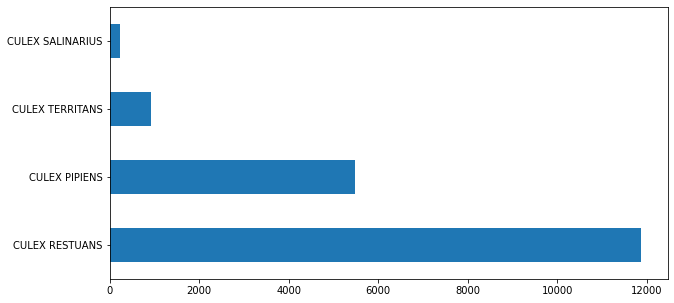

In [15]:
df1['Species'].value_counts().plot(kind='barh', figsize=(10, 5))

The data shows that there is a higher number of _Culex Restuans_ species of Mosquitos.

<AxesSubplot:>

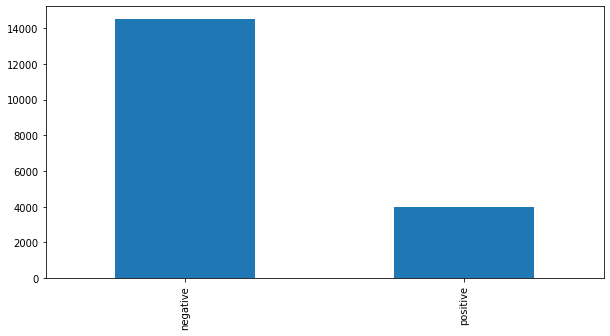

In [16]:
df1['WNV Present'].value_counts().plot(kind='bar', figsize=(10, 5)
                                      )

Most mosquitos that were caught in the traps do not carry the West Nile Virus.

In [17]:
# Numerical Data
df1['Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
18490    2016
18491    2007
18492    2016
18493    2017
18494    2015
Name: Year, Length: 18495, dtype: int64

In [18]:
df1['Mosquito number']

0         2
1         1
2         2
3         1
4         9
         ..
18490     4
18491    19
18492    34
18493    50
18494     6
Name: Mosquito number, Length: 18495, dtype: int64

In [19]:
#Looking at Year column distribution:
df1['Year'].value_counts() / df1.shape[0]*100.0

2007    11.576102
2014    10.813733
2016     9.970262
2013     8.780752
2010     7.553393
2012     7.526358
2018     7.358746
2019     6.536902
2015     6.369289
2009     6.136794
2011     6.055691
2017     6.001622
2008     5.320357
Name: Year, dtype: float64

<AxesSubplot:>

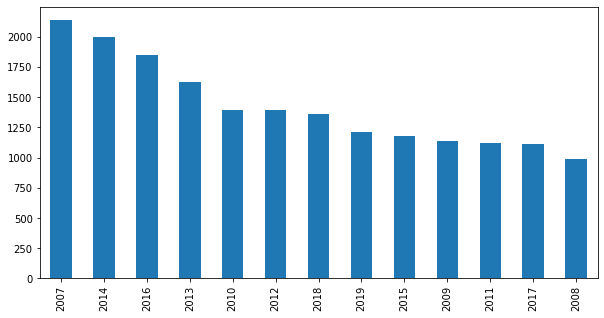

In [20]:
df1['Year'].value_counts().plot(kind='bar', figsize=(10, 5))

More WNV tests were performed in 2007, with the number of tests performed dropping each year.

In [21]:
#Looking at Mosquito Number column distribution:
df1['Mosquito number'].mean()

10.879913490132468

In [22]:
df1['Mosquito number'].median()

5.0

In [23]:
df1['Mosquito number'].value_counts()

1     4141
2     2263
3     1564
4     1105
5      918
6      722
50     647
7      610
8      536
9      437
10     366
11     362
12     343
13     293
14     256
15     239
16     225
17     211
18     189
21     182
19     166
23     153
20     152
27     136
26     129
31     128
29     127
28     118
24     116
25     116
22     115
32     103
47      97
37      95
46      92
33      91
36      81
43      81
34      80
45      76
30      75
39      71
44      70
35      67
41      65
48      65
42      63
38      63
40      49
49      46
Name: Mosquito number, dtype: int64

The Mosquito number column is the counted number of mosquitos caught in each trap, applying the `values_counted()` counts each time the same number of mosquitos was caught.

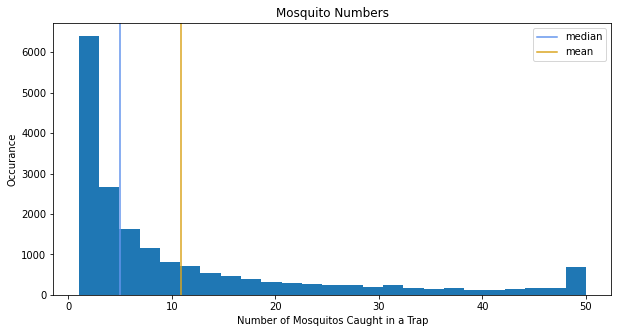

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(df1['Mosquito number'], bins=25)
plt.xlabel('Number of Mosquitos Caught in a Trap')
plt.ylabel('Occurance')
plt.title('Mosquito Numbers')
plt.axvline(df1['Mosquito number'].median(), label='median', color='cornflowerblue')
plt.axvline(df1['Mosquito number'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

The above plot is a histogram showing the occurance of number of mosquitos caught each time traps were laid out.
According to the distribution, traps are more likely to trap between 5 and 10 mosquitos per trap.
There are some outlier values at the 50 count.

<AxesSubplot:xlabel='Mosquito number'>

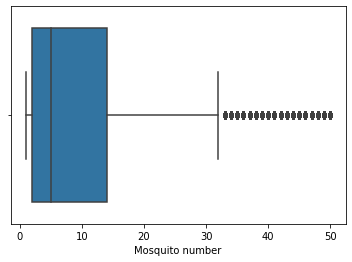

In [25]:
#Visualising the distribution on a boxplot:
sns.boxplot(x=df1['Mosquito number'])

Using a boxplot to better visualise this columns, it is apparent that there are a lot of outliers, this is most likely caused by how the data is split between the rows, with a cap on the number of mosquitos at 50, this means it is best to keep these outliers as they are important data points.

In [26]:
#3- Looking at number of duplicated rows:
df1.duplicated().sum()

658

In [27]:
round(df1.duplicated().sum()/ df1.shape[0]*100.0)

4.0

4% of the rows are duplicates.

In [28]:
#Taking a look at the duplicate rows:
df1[df1.duplicated(keep=False)].head(100)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
187,2019,35,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-29 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN
273,2019,34,100XX W OHARE AIRPORT,100,T901,GRAVID,2019-08-22 00:08:00,16,Res,positive,CULEX RESTUANS,NaN,NaN
310,2019,33,100XX W OHARE,100,T903,GRAVID,2019-08-15 00:08:00,3,Res,positive,CULEX RESTUANS,NaN,NaN
341,2019,33,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-15 00:08:00,15,Res,positive,CULEX RESTUANS,NaN,NaN
398,2019,32,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-08 00:08:00,8,Res,positive,CULEX RESTUANS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,2016,29,100XX W OHARE AIRPORT,100,T906,GRAVID,2016-07-21 00:07:00,12,Res,positive,CULEX RESTUANS,NaN,NaN
3851,2016,29,100XX W OHARE AIRPORT,100,T913,GRAVID,2016-07-21 00:07:00,42,Res,positive,CULEX RESTUANS,NaN,NaN
3859,2016,29,100XX W OHARE AIRPORT,100,T911,GRAVID,2016-07-21 00:07:00,47,Res,positive,CULEX RESTUANS,NaN,NaN
3868,2016,28,100XX W OHARE AIRPORT,100,T905,GRAVID,2016-07-14 00:07:00,24,Res,positive,CULEX RESTUANS,NaN,NaN


In [29]:
#Removing duplicated rows and assigning to a new variable df2:

df2 = df1.drop_duplicates()

In [30]:
#Checking that duplicates have been dropped:
df2.duplicated().sum()

0

In [31]:
# Checking for duplicated columns:
df1.T.duplicated(keep=False)

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [32]:
# 4- Looking for null values in the data:
df2.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [33]:
#Percentage of null values in the columns
df2.isna().sum()/df2.shape[0]*100.0

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

Most of the null values are in the latitude and longitude columns, ~13% null values.

In [34]:
#Taking a closer look at Lat:
df2['Lat'].mean()

41.83996347772076

In [35]:
df2['Lat'].median()

41.845715401999996

In [36]:
df2['Lat'].mode()

0    41.956299
dtype: float64

In [37]:
df2['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

/home/amina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/amina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


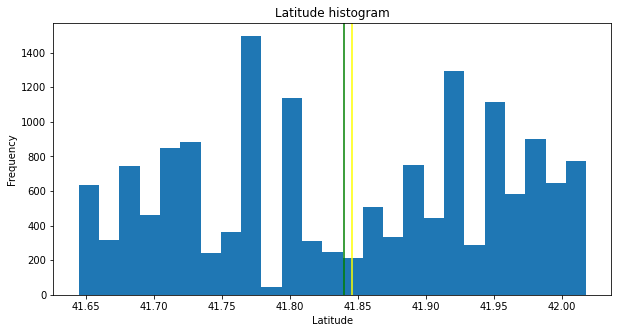

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(df2['Lat'].values, bins=25)
plt.axvline(df2['Lat'].mean(), label='mean', color='green')
plt.axvline(df2['Lat'].median(), label='median', color='yellow')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Latitude histogram')
plt.show()

The missing values in column 'Lat' will be replaced by using the mean value for Lat column.

In [39]:
df2['Lat'] = df2['Lat'].fillna(df2['Lat'].mean())

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                   0
Lon                2266
dtype: int64

In [41]:
#Taking a look at Lon column:
df2['Lon'].mean()

-87.69164248395428

In [42]:
df2['Lon'].median()

-87.691697729

In [43]:
df2['Lon'].mode()

0   -87.797517
dtype: float64

In [44]:
df2['Lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

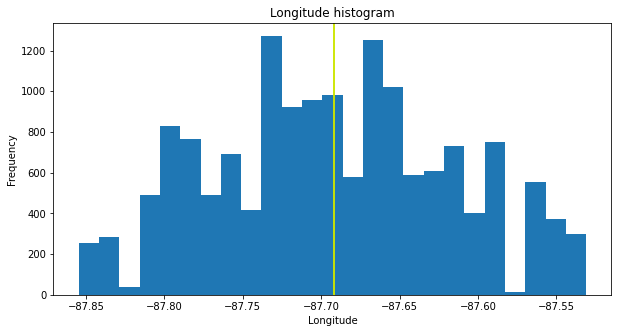

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(df2['Lon'].values, bins=25)
plt.axvline(df2['Lon'].mean(), label='mean', color='green')
plt.axvline(df2['Lon'].median(), label='median', color='yellow')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude histogram')
plt.show()

The missing values in column 'Lon' will be replaced by using the mean value for Lon column.

In [46]:
df2['Lon'] = df2['Lon'].fillna(df2['Lon'].mean())

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df2.isna().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

#### Exploring the relationship between mosquito number and date.

Previously looked at mosquito number counts.

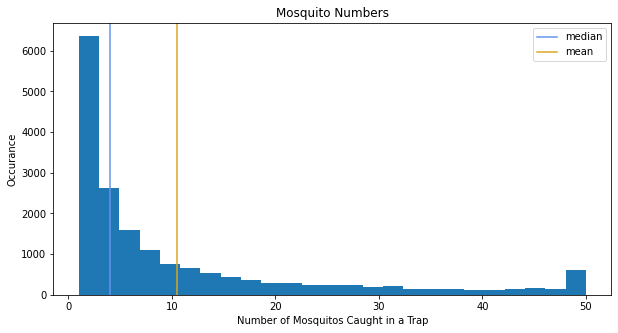

In [48]:
plt.figure(figsize=(10, 5))
plt.hist(df2['Mosquito number'], bins=25)
plt.xlabel('Number of Mosquitos Caught in a Trap')
plt.ylabel('Occurance')
plt.title('Mosquito Numbers')
plt.axvline(df2['Mosquito number'].median(), label='median', color='cornflowerblue')
plt.axvline(df2['Mosquito number'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In order to explore the relationship between number of mosquitos caught, I will create four columns titled 'Month', 'Day', 'Hour', and 'Minute' which will be extracted from the Date column. This can be done with the following code, and because I already changed the Date column format to datetime64. 

In [49]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df2['Hour'] = pd.DatetimeIndex(df2['Date']).hour

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df2['Day'] = pd.DatetimeIndex(df2['Date']).day

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df2['Minute'] = pd.DatetimeIndex(df2['Date']).minute

/home/amina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


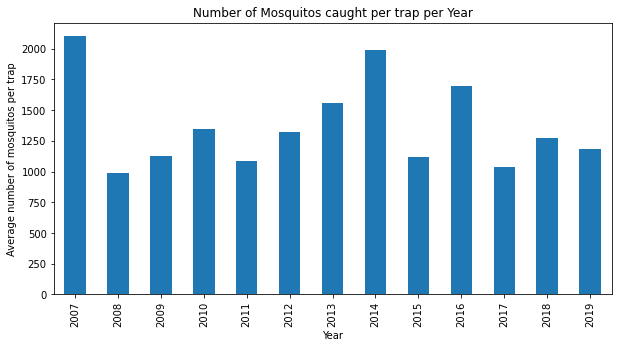

In [53]:
df2.groupby('Year')['Mosquito number'].count().plot(kind='bar', figsize=(10, 5))
plt.ylabel('Average number of mosquitos per trap')
plt.xlabel('Year')
plt.title('Number of Mosquitos caught per trap per Year')
plt.show()

Data shows that during 2007 there were more mosquitos caught per trap.

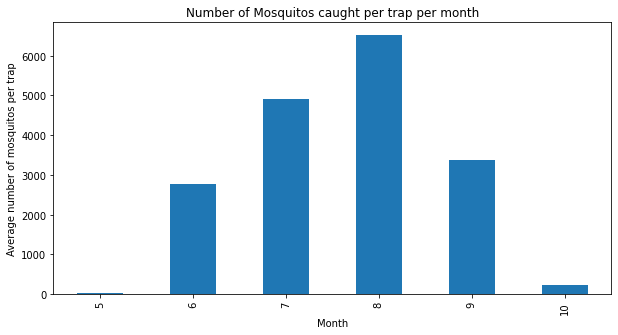

In [54]:
df2.groupby('Month')['Mosquito number'].count().plot(kind='bar', figsize=(10, 5))
plt.ylabel('Average number of mosquitos per trap')
plt.xlabel('Month')
plt.title('Number of Mosquitos caught per trap per month')
plt.show()

Looking at the `value_counts()` of the number of mosquitos caught is increased during the summer months of June to August. However there is missing data for the rest of the months of the year, so this pattern could change with addition of new data.

In [55]:
df2['Mosquito number'].corr(df2['Month'])

-0.04094150320273162

<AxesSubplot:xlabel='Day'>

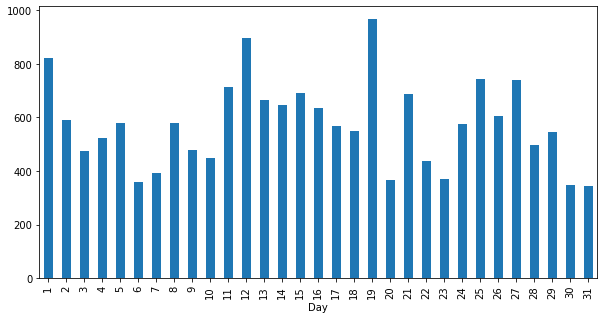

In [56]:
df2.groupby('Day')['Mosquito number'].count().plot(kind='bar', figsize=(10, 5))

There is not a pattern in the data of number of mosquitos caught per day, it seems random.

In [57]:
df2[['Mosquito number', 'Trap', 'Day']].sort_values(by= 'Mosquito number')

,Mosquito number,Trap,Day
12202,1,T063,17
3363,1,T155,1
8129,1,T089,28
8134,1,T158,28
8136,1,T048,28
...,...,...,...
5943,50,T002,14
14032,50,T138,12
17026,50,T225,27
5989,50,T002,14


#### Relationship between mosquito species and WNV prevalence

In [58]:
#Grouping by Species and WNV Present, and aggregating on Species counts:
df2.groupby(['Species', 'WNV Present'])['Species'].count().unstack()

WNV Present,negative,positive
Species,,
CULEX PIPIENS,4074,1237
CULEX RESTUANS,9309,2078
CULEX SALINARIUS,215,7
CULEX TERRITANS,903,14


In [59]:
#Percentile of number of negatives and positives per Species:
((df2.groupby(['Species', 'WNV Present'])['Species'].count()/\
df2.groupby('Species')['Species'].count())*100).unstack()

WNV Present,negative,positive
Species,,
CULEX PIPIENS,76.708718,23.291282
CULEX RESTUANS,81.751120,18.248880
CULEX SALINARIUS,96.846847,3.153153
CULEX TERRITANS,98.473282,1.526718


In [63]:
plt.figure(figsize=(10, 5))
Species_WNV = df2.groupby(['Species', 'WNV Present'])['Species'].count()/\
df2.groupby('Species')['Species'].count()
pct_registered_df.unstack().plot(kind='barh', stacked=True)
plt.legend(loc = (1.2, 0.5))
plt.show()

NameError: name 'pct_registered_df' is not defined

<Figure size 720x360 with 0 Axes>

Overall, of the species tested most mosquitos were negative for WNV, however around 23% of positives are of the species _Culex Pipiens_.

#### Relationship between the number of mosquitos caught and trap type

In [ ]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Trap type", y="Mosquito number", palette=["orange", "blue"],data=df2, fliersize=1)
sns.despine(offset=10, trim=True)

- GRAVID traps caught less numbers of mosquitos, and also seems to the the trap that corresponds to the outlier data.
- SENTINEL and CDC traps were variable in the number of mosquitos caught per trap. CDC has a lower median suggesting most number of mosquitos caught in these traps tend to be on the lower side.
- OVI trap is not showing a lot of data, however this isn't a problem with the data, there only seems to be one trap with one successful catch (see follwing table).

In [66]:
df2.groupby(['Mosquito number', 'Trap type'])['Mosquito number'].count().unstack()

Trap type,CDC,GRAVID,OVI,SENTINEL
Mosquito number,,,,
1,111.0,3997.0,1.0,10.0
2,51.0,2183.0,NaN,8.0
3,33.0,1503.0,NaN,8.0
4,26.0,1049.0,NaN,5.0
5,35.0,852.0,NaN,8.0
6,7.0,689.0,NaN,10.0
7,10.0,578.0,NaN,5.0
8,7.0,503.0,NaN,3.0
9,7.0,390.0,NaN,10.0


#### Relationship between Species and Trap type.

In [65]:
df2.groupby(['Species', 'Trap type'])['Species'].count().unstack()

Trap type,CDC,GRAVID,OVI,SENTINEL
Species,,,,
CULEX PIPIENS,373.0,4919.0,1.0,18.0
CULEX RESTUANS,124.0,11076.0,NaN,187.0
CULEX SALINARIUS,20.0,201.0,NaN,1.0
CULEX TERRITANS,12.0,902.0,NaN,3.0


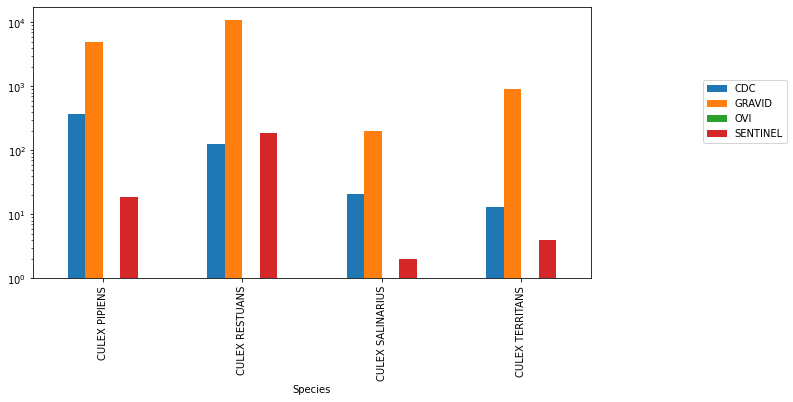

In [64]:
df2.groupby(['Species', 'Trap type'])['Species'].count().unstack().plot(kind='bar', log=True, figsize=(10, 5))
plt.legend(loc=(1.2, 0.5))

- Comparing all the Species of mosquitos with the traps that caught them, shows at first glance that GRAVID traps are most successful at catching all species of mosquito, especially _Culex Restuans_.
- Further CDC appears to be best for catching _Culex Pipiens_.
- OVI appears to be an unsuccessful trap type overall.